GitHub<br>
https://github.com/zhangbaijin/SpA-Former-shadow-removal<br>
論文<br>
https://arxiv.org/abs/2206.10910v1<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/SpA_Former_shadow_removal_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

## GPU確認

In [1]:
!nvidia-smi

Fri Dec 12 13:48:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Githubからソースコード取得

In [2]:
%cd /content

!git clone https://github.com/zhangbaijin/SpA-Former-shadow-removal.git

/content
Cloning into 'SpA-Former-shadow-removal'...
remote: Enumerating objects: 373, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 373 (delta 23), reused 2 (delta 0), pack-reused 330 (from 1)
Receiving objects: 100% (373/373), 31.65 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (182/182), done.


## ライブラリのインストール

In [20]:
%cd /content/SpA-Former-shadow-removal

!pip install gdown==4.5.1
!pip install einops

/content/SpA-Former-shadow-removal


## ライブラリのインポート

In [21]:
%cd /content/SpA-Former-shadow-removal

import os
import glob

/content/SpA-Former-shadow-removal


# 学習済みモデルのセットアップ

In [5]:
%cd /content/SpA-Former-shadow-removal
!mkdir -p ./checkpoint

if not os.path.exists('checkpoint/gen_model_epoch_160.pth'):
  !gdown https://drive.google.com/uc?id=1gLOu4jkqslu_fWpQUd0N4hcNz4qCD8Xc -O checkpoint/gen_model_epoch_160.pth
if not os.path.exists('checkpoint/dis_model_epoch_160.pth'):
  !gdown https://drive.google.com/uc?id=1AcJSAV4oHiYneYUxCwaV0M_W1QU4MdZX -O checkpoint/dis_model_epoch_160.pth

/content/SpA-Former-shadow-removal
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1gLOu4jkqslu_fWpQUd0N4hcNz4qCD8Xc 

Downloading...
From: https://drive.google.com/uc?id=1AcJSAV4oHiYneYUxCwaV0M_W1QU4MdZX
To: /content/SpA-Former-shadow-removal/checkpoint/dis_model_epoch_160.pth
100% 11.1M/11.1M [00:00<00:00, 19.7MB/s]


# テスト画像のセットアップ

In [22]:
%cd /content/SpA-Former-shadow-removal
!rm -rf ./test_imgs
!mkdir -p ./test_imgs
!mkdir -p ./datasets

!wget -c https://cdn.pixabay.com/photo/2016/04/11/03/00/run-1321278_960_720.jpg \
      -O ./test_imgs/test_01.jpg

!wget -c https://cdn.pixabay.com/photo/2013/10/20/22/05/shadow-198682_960_720.jpg \
      -O ./test_imgs/test_02.jpg

!wget -c https://cdn.pixabay.com/photo/2015/09/09/20/33/travel-933171_960_720.jpg \
      -O ./test_imgs/test_03.jpg

!wget -c https://cdn.pixabay.com/photo/2021/08/02/18/21/stairs-6517488_960_720.jpg \
      -O ./test_imgs/test_04.jpg

if not os.path.exists('datasets/ISTD_Dataset.rar'):
  !gdown https://drive.google.com/uc?id=1I0qw-65KBA6np8vIZzO6oeiOvcDBttAY -O datasets/ISTD_Dataset.rar

/content/SpA-Former-shadow-removal
--2025-12-12 14:31:56--  https://cdn.pixabay.com/photo/2016/04/11/03/00/run-1321278_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2a06:98c1:3107::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158720 (155K) [image/jpeg]
Saving to: ‘./test_imgs/test_01.jpg’

./test_imgs/test_01 100%[===================>] 155.00K  --.-KB/s    in 0.004s  

2025-12-12 14:31:56 (39.5 MB/s) - ‘./test_imgs/test_01.jpg’ saved [158720/158720]

--2025-12-12 14:31:56--  https://cdn.pixabay.com/photo/2013/10/20/22/05/shadow-198682_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2a06:98c1:3107::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214773 (210K) [image/jpeg]
Saving to: ‘./test_imgs/t

In [23]:
from google.colab import drive
drive.mount('/content/drive')

# https://drive.google.com/file/d/1I0qw-65KBA6np8vIZzO6oeiOvcDBttAY/view
# 上記ファイルのショートカットを自身のGoogle Driveに追加した場合のみ以下を実行

!unrar x /content/drive/MyDrive/ISTD_Dataset.rar /content/SpA-Former-shadow-removal/datasets > /dev/null

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Shadow Remove



/content/SpA-Former-shadow-removal
['/content/SpA-Former-shadow-removal/shadowy_images/man_with_shadow.png', '/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example2.png', '/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example3.png', '/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example1.JPG']
/content/SpA-Former-shadow-removal/shadowy_images/man_with_shadow.png
Random Seed:  12
===> Loading models
<=== Model loaded
===> Loading test image
<=== test image loaded
===> Removing the cloud...
<=== finish! 1.622s cost.


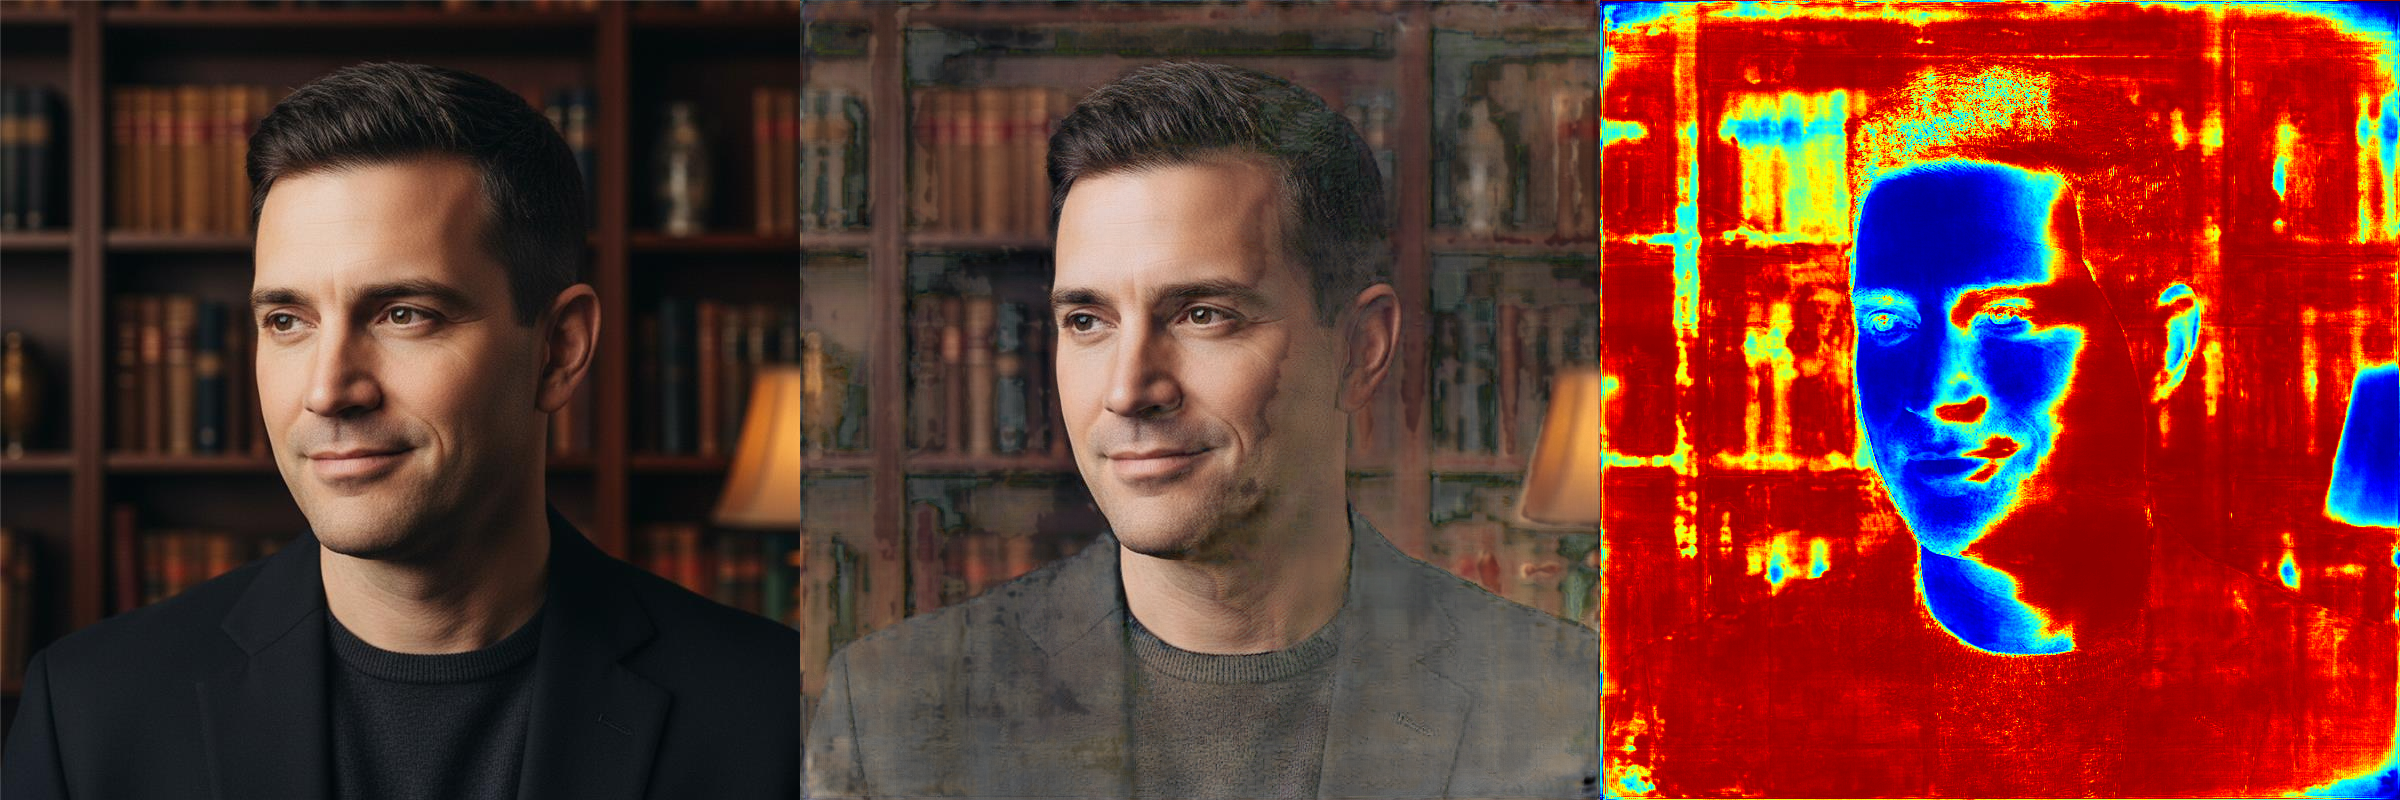

/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example2.png
Random Seed:  12
===> Loading models
<=== Model loaded
===> Loading test image
<=== test image loaded
===> Removing the cloud...
<=== finish! 0.553s cost.


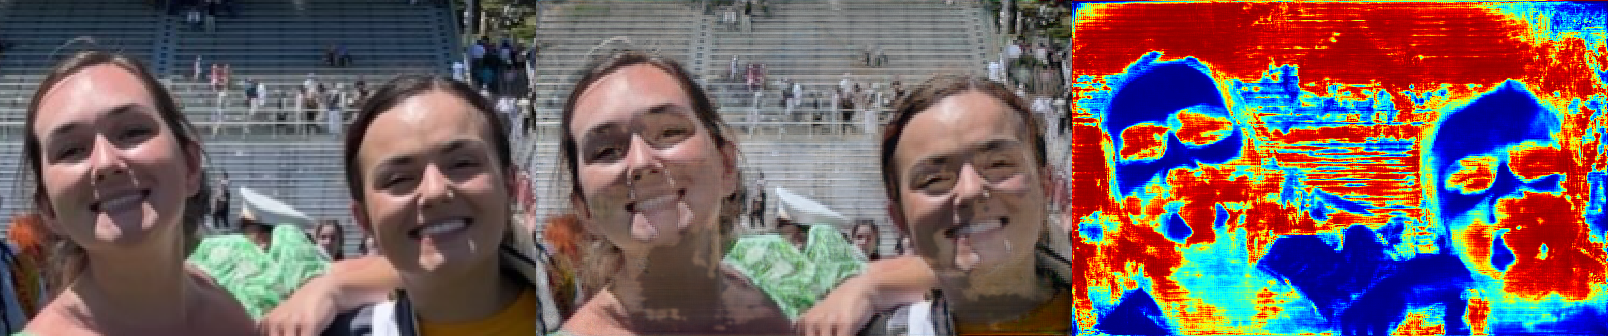

/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example3.png
Random Seed:  12
===> Loading models
<=== Model loaded
===> Loading test image
<=== test image loaded
===> Removing the cloud...
<=== finish! 1.026s cost.


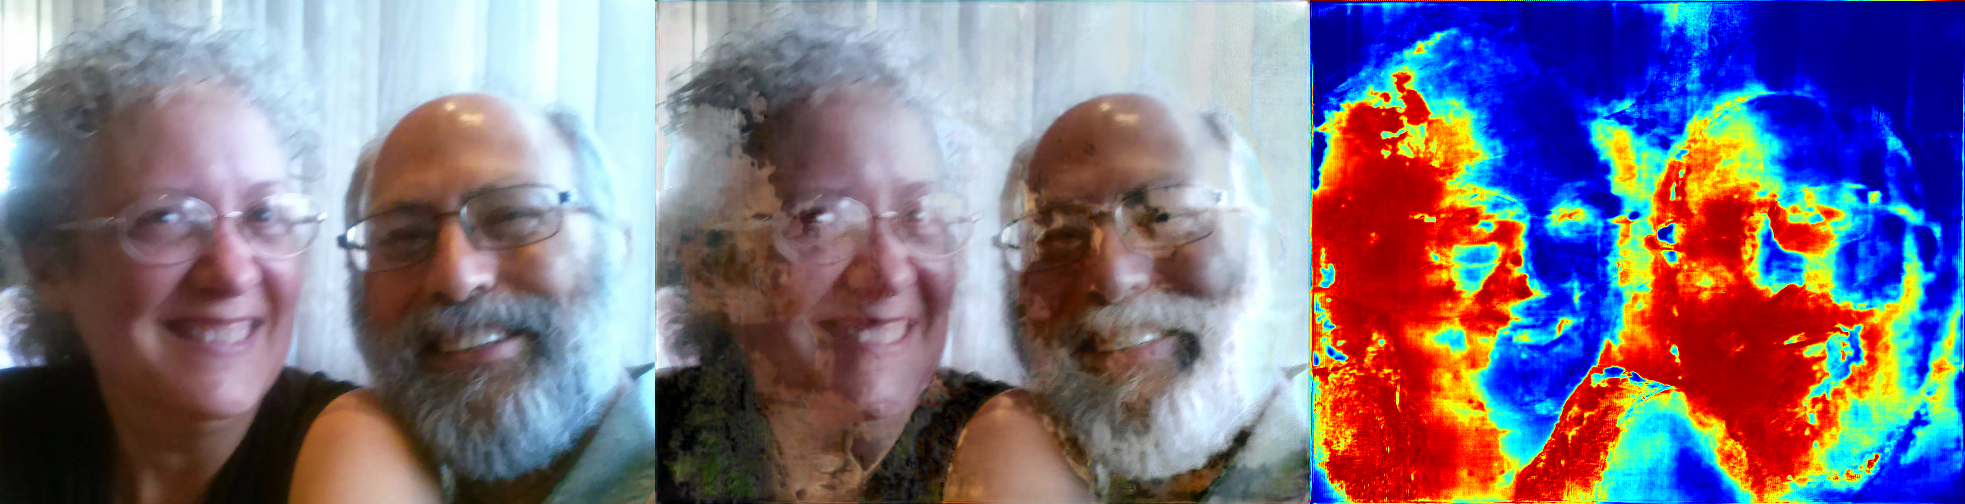

/content/SpA-Former-shadow-removal/shadowy_images/mars_shadow_example1.JPG
Random Seed:  12
===> Loading models
<=== Model loaded
===> Loading test image
<=== test image loaded
===> Removing the cloud...
<=== finish! 0.030s cost.


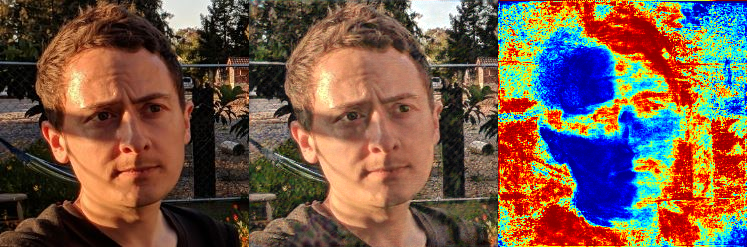

In [31]:
%cd /content/SpA-Former-shadow-removal

import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import time

import torch
from torch.autograd import Variable

from utils import gpu_manage, heatmap
from SpA_Former import Generator
from google.colab.patches import cv2_imshow

def predict(args):

    gpu_manage(args)
    ### MODELS LOAD ###
    print('===> Loading models')

    gen = Generator(gpu_ids=args.gpu_ids)

    param = torch.load(args.pretrained)
    gen.load_state_dict(param)

    if args.cuda:
        gen = gen.cuda(0)

    print ('<=== Model loaded')

    print('===> Loading test image')
    img = cv2.imread(args.test_filepath, 1).astype(np.float32)
    img = img / 255
    img = img.transpose(2, 0, 1)
    img = img[None]
    print ('<=== test image loaded')

    with torch.no_grad():
        x = torch.from_numpy(img)
        if args.cuda:
            x = x.cuda()

        print('===> Removing the cloud...')
        start_time = time.time()
        att, out = gen(x)
        print('<=== finish! %.3fs cost.' % (time.time()-start_time))

        x_ = x.cpu().numpy()[0]
        x_rgb = x_ * 255
        x_rgb = x_rgb.transpose(1, 2, 0).astype('uint8')
        out_ = out.cpu().numpy()[0]
        out_rgb = np.clip(out_[:3], 0, 1) * 255
        out_rgb = out_rgb.transpose(1, 2, 0).astype('uint8')
        att_ = att.cpu().numpy()[0] * 255
        att_heatmap = heatmap(att_.astype('uint8'))[0]
        att_heatmap = att_heatmap.transpose(1, 2, 0)

        allim = np.hstack((x_rgb, out_rgb, att_heatmap))

        cv2_imshow(allim)

        allim = np.hstack((x_rgb, out_rgb))

        file_name = args.test_filepath.split("/")[-1].split(".")[0]
        cv2.imwrite(f"{file_name}_result.png", allim)

images = glob.glob('/content/SpA-Former-shadow-removal/shadowy_images/*')

args = argparse.ArgumentParser()
args.pretrained = './checkpoint/gen_model_epoch_160.pth'
args.cuda = True
args.gpu_ids = [0]
args.manualSeed = 12
print(images)
for img in images:
  print(img)
  args.test_filepath = img
  predict(args)

In [27]:

images = glob.glob('./test_imgs/*.jpg')   #  /content/SpA-Former-shadow-removal/test_imgs
images

['./test_imgs/test_03.jpg',
 './test_imgs/test_02.jpg',
 './test_imgs/test_04.jpg',
 './test_imgs/test_01.jpg']

Random Seed:  12
===> Loading models
<=== Model loaded
===> Loading test image
<=== test image loaded
===> Removing the cloud...
<=== finish! 0.591s cost.


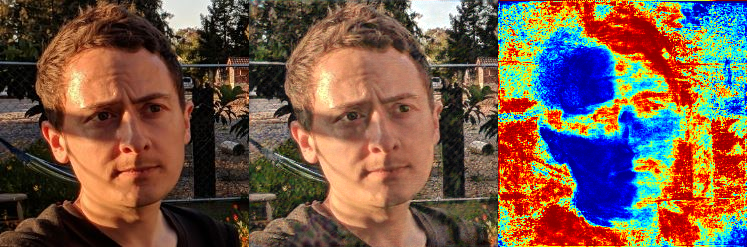

In [29]:
args.test_filepath = '/content/SpA-Former-shadow-removal/test_imgs/mars_shadow_example1.JPG'
a = predict(args)

In [ ]:
predict(args)

In [13]:

images = glob.glob('/content/SpA-Former-shadow-removal/test_imgs/*.jpg')
images

[]

In [ ]:
import random

datasets = glob.glob('/content/SpA-Former-shadow-removal/datasets/ISTD_Dataset/test/test_A/*.png')

tests = random.sample(datasets, 5)

for img in tests:
  args.test_filepath = img
  predict(args)